In [4]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from utils.utils import log_transform, plot_clusters
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.optimize as opt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv('data/smote/labelled.csv')
data.head(3)

,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,30500000.0,70.734,-68.02,52.47,1
1,3050000.0,50.162,-95.70,32.63,1
2,305000.0,-8.390,-99.96,-10.41,1


## Without Standard Scaling

In [32]:
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['label']

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_features)
data['Cluster_PCA'] = kmeans_pca.labels_ + 1  # Add 1 to match original labels

data.head()

,CFU/mL,Sensor2,Sensor1,Sensor3,label,Cluster_PCA
0,30500000.0,70.734,-68.02,52.47,1,3
1,3050000.0,50.162,-95.70,32.63,1,3
2,305000.0,-8.390,-99.96,-10.41,1,3
3,30500.0,-18.700,-107.42,-23.93,1,3
4,3050.0,-19.620,-109.94,-27.24,1,3


In [33]:
comparison_pca = pd.crosstab(data['label'], data['Cluster_PCA'], rownames=['Actual'], colnames=['Cluster'])
print("\nComparison for PCA-Transformed Data:")
print(comparison_pca)


Comparison for PCA-Transformed Data:
Cluster   1   2   3
Actual             
1         0   0  25
2        16   0   9
3         0  25   0


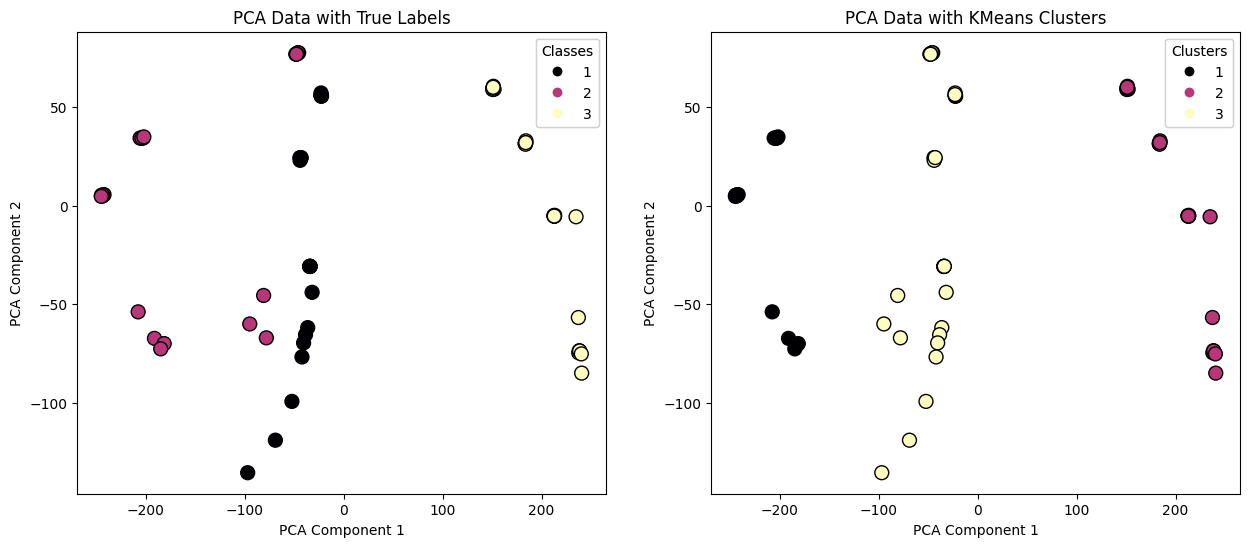

In [34]:
plot_clusters(features, data, pca_features, 'docs/plots/exponential_kmeans/Original_vs_PCA.png')

In [9]:
# data['Cluster_Original'] = data['Cluster_Original'].replace({1: 2, 2: 1})
# data['Cluster_PCA'] = data['Cluster_PCA'].replace({0: 0, 1: 2, 2: 1})

value_counts_df = pd.DataFrame({
    'True Label': data['label'].value_counts(),
    'Cluster_PCA': data['Cluster_PCA'].value_counts()
}).transpose()

value_counts_df

,1,2,3
True Label,25,25,25
Cluster_PCA,16,25,34


## With Standard Scaling Results

In [20]:
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['label']

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_features)
data['Cluster_PCA'] = kmeans_pca.labels_ + 1  # Add 1 to match original labels

In [21]:
comparison_pca = pd.crosstab(data['label'], data['Cluster_PCA'], rownames=['Actual'], colnames=['Cluster'])
print("\nComparison for PCA-Transformed Data:")
print(comparison_pca)


Comparison for PCA-Transformed Data:
Cluster   1   2   3
Actual             
1        12   0  13
2        19   0   6
3         0  19   6


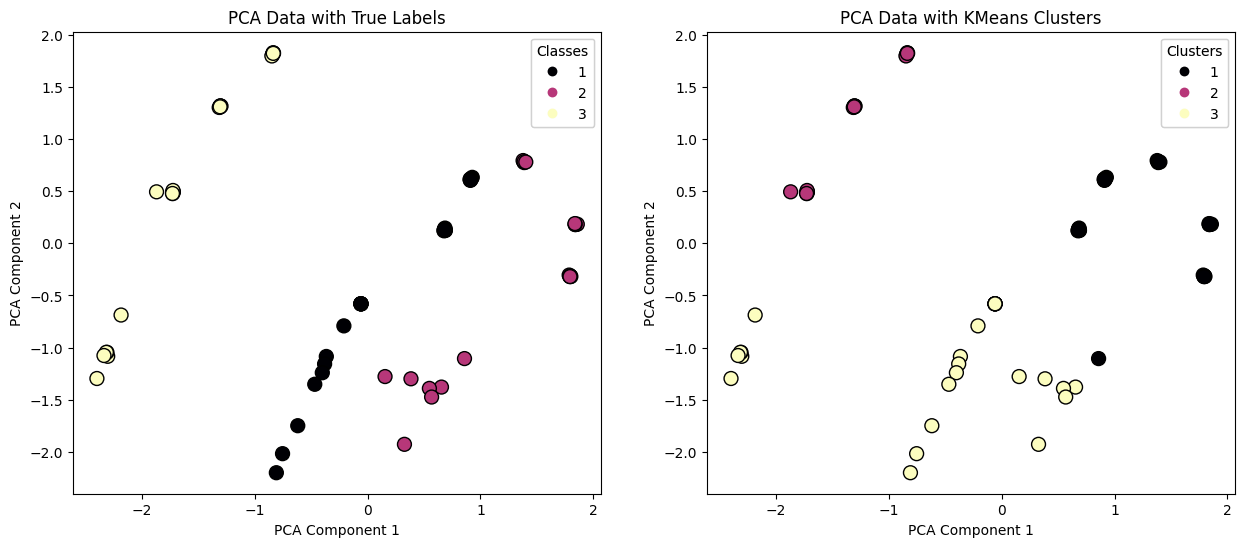

In [22]:
plot_clusters(features, data, pca_features, 'docs/plots/exponential_kmeans/Original_vs_PCA_scaled.png')

In [23]:
value_counts_df = pd.DataFrame({
    'True Label': data['label'].value_counts(),
    'Cluster_PCA': data['Cluster_PCA'].value_counts()
}).transpose()

value_counts_df

,1,2,3
True Label,25,25,25
Cluster_PCA,31,19,25
